<a href="https://colab.research.google.com/github/natreis02/Bootcamp/blob/main/Atividade_enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import json

# Selecionar arquivo
uploaded = files.upload()

# Ler o arquivo
with open('enem.json', 'r') as file:
    data = json.load(file)


Saving enem.json to enem (1).json


Você é uma pesquisadora de um cursinho para estudantes que querem
ingressar na universidade em 2025. Seu objetivo é retirar informações da
base de dados do enem do ano anterior para alinhar melhor as estratégias do
cursinho para cada estudante.
O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o
gênero das pessoas que fizeram a prova. No dado existe a representação de
1000 pessoas, sendo cada uma delas uma linha.

1. Qual das disciplinas tem a maior amplitude de nota?

In [ ]:
import pandas as pd
import json

# Ler o arquivo
with open('enem.json', 'r') as file:
    dados_dict = json.load(file)

# Converter para um DataFrame
df = pd.DataFrame(dados_dict)

# Salvar o DataFrame em CSV
df.to_csv('dados.csv', index=False)
print(df.head())

# Calcular a amplitude de nota para cada disciplina
amplitude_por_disciplina = df.max(numeric_only=True) - df.min(numeric_only=True)

# Identificar a disciplina com a maior amplitude
disciplina_maior_amplitude = amplitude_por_disciplina.idxmax()

# Imprimir os resultados
print(f"A disciplina com a maior amplitude de nota é: {disciplina_maior_amplitude}")
print("Amplitude por disciplina:")
print(amplitude_por_disciplina)

   Linguagens  Ciências humanas  Ciências da natureza  Matemática     Redação  \
0  585.669300        686.512178            390.482473  452.281333  546.371706   
1  359.384608        642.084134                   NaN  412.205207  741.825256   
2  622.732384        495.510719            443.183580  669.683401  684.515750   
3  350.164605        602.041588            413.979810  676.608952  671.237114   
4  384.093657        489.249140            609.758123  520.426698  744.375048   

     Sexo  
0   Homem  
1  Mulher  
2   Homem  
3   Homem  
4   Homem  
A disciplina com a maior amplitude de nota é: Redação
Amplitude por disciplina:
Linguagens              517.456317
Ciências humanas        474.019695
Ciências da natureza    487.604568
Matemática              488.077902
Redação                 729.160035
dtype: float64


2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se
de remover todos os valores nulos quando considerar a mediana)

In [ ]:
# Calcular a média
media_por_disciplina = df.mean(numeric_only=True)

# Calcular a mediana
mediana_por_disciplina = df.median(numeric_only=True)

# Imprimir os resultados
print("Média por disciplina:")
print(media_por_disciplina)
print("\nMediana por disciplina (removendo valores nulos):")
print(mediana_por_disciplina)

Média por disciplina:
Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

Mediana por disciplina (removendo valores nulos):
Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:

a. Redação - 2
b. Matemática e suas Tecnologias - 4
c. Linguagens, Códigos e suas Tecnologias - 2
d. Ciências Humanas e suas Tecnologias - 1
e. Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?

In [ ]:
# Imprimir as colunas disponíveis no DataFrame
print("Colunas disponíveis no DataFrame:")
print(df.columns)

# Definir pesos para cada disciplina
pesos = {
    'redacao': 2,
    'matematica': 4,
    'linguagens': 2,
    'ciencias_humanas': 1,
    'ciencias_da_natureza': 1
}

# Calcular a nota total ponderada para cada estudante
df['nota_total_ponderada'] = (
    df['Redação'] * pesos['redacao'] +
    df['Matemática'] * pesos['matematica'] +
    df['Linguagens'] * pesos['linguagens'] +
    df['Ciências humanas'] * pesos['ciencias_humanas'] +
    df['Ciências da natureza'] * pesos['ciencias_da_natureza']
)  / sum(pesos.values())  # Dividir pela soma dos pesos

# (substitua 500 pelo número real que representa os melhores colocados no seu conjunto de dados)
top_500_estudantes = df.nlargest(500, 'nota_total_ponderada')

media_top_500 = top_500_estudantes['nota_total_ponderada'].mean()
desvio_padrao_top_500 = top_500_estudantes['nota_total_ponderada'].std()

# Imprimir os resultados
print(f"Média das notas dos 500 estudantes mais bem colocados: {media_top_500}")
print(f"Desvio padrão das notas dos 500 estudantes mais bem colocados: {desvio_padrao_top_500}")



Colunas disponíveis no DataFrame:
Index(['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática',
       'Redação', 'Sexo'],
      dtype='object')
Média das notas dos 500 estudantes mais bem colocados: 557.2896772018769
Desvio padrão das notas dos 500 estudantes mais bem colocados: 40.435866299464266


4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?

In [ ]:
# Selecionar os top 40 estudantes
top_40_estudantes = df.nlargest(40, 'nota_total_ponderada')

# Calcular a nota total ponderada para cada estudante
df['nota_total_ponderada'] = (
    df['Redação'] * pesos['redacao'] +
    df['Matemática'] * pesos['matematica'] +
    df['Linguagens'] * pesos['linguagens'] +
    df['Ciências humanas'] * pesos['ciencias_humanas'] +
    df['Ciências da natureza'] * pesos['ciencias_da_natureza']
) / sum(pesos.values())

# Calcular a variância e média da nota dos estudantes de ciência da computação
variancia_ciencia_computacao = top_40_estudantes['nota_total_ponderada'].var()
media_ciencia_computacao = top_40_estudantes['nota_total_ponderada'].mean()

# Imprimir os resultados
print(f"Variância da nota dos estudantes de Ciência da Computação: {variancia_ciencia_computacao}")
print(f"Média da nota dos estudantes de Ciência da Computação: {media_ciencia_computacao}")

Variância da nota dos estudantes de Ciência da Computação: 295.7675036004101
Média da nota dos estudantes de Ciência da Computação: 636.6827415075188


5. Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?

In [ ]:
import numpy as np

# Calcular o terceiro quartil para Matemática
q3_matematica = df['Matemática'].quantile(0.75)

# Calcular o teto do terceiro quartil para Matemática
teto_q3_matematica = df['Matemática'][df['Matemática'] <= q3_matematica].max()

# Calcular o terceiro quartil Linguagens
q3_linguagens = df['Linguagens'].quantile(0.75)

# Calcular o teto do terceiro quartil  Linguagens
teto_q3_linguagens = df['Linguagens'][df['Linguagens'] <= q3_linguagens].max()

# Imprimir os resultados
print(f"Teto do terceiro quartil para Matemática: {teto_q3_matematica}")
print(f"Teto do terceiro quartil para Linguagens: {teto_q3_linguagens}")



Teto do terceiro quartil para Matemática: 592.7176584004
Teto do terceiro quartil para Linguagens: 571.6358759278


6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?


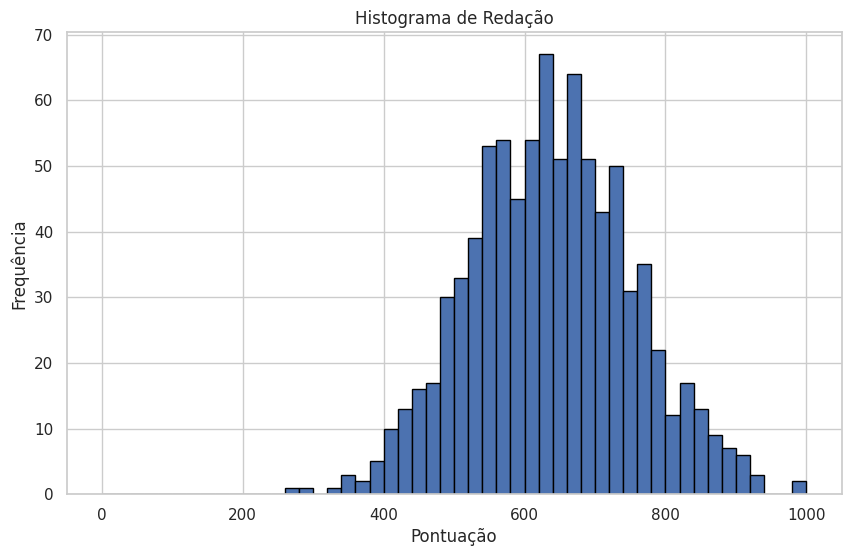

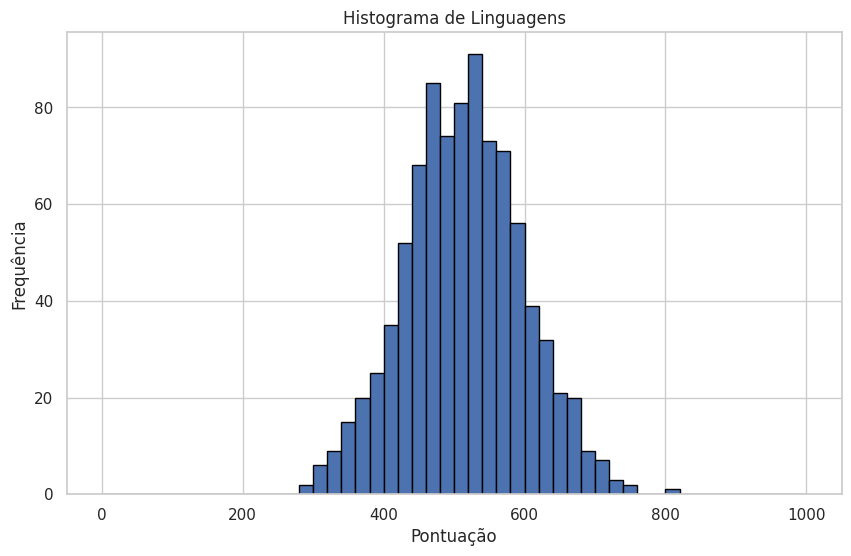

In [ ]:
import matplotlib.pyplot as plt

# Histograma Redação
plt.figure(figsize=(10, 6))
plt.hist(df['Redação'], bins=range(0, 1001, 20), edgecolor='black')
plt.title('Histograma de Redação')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Histograma Linguagens
plt.figure(figsize=(10, 6))
plt.hist(df['Linguagens'], bins=range(0, 1001, 20), edgecolor='black')
plt.title('Histograma de Linguagens')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()



**Aparentemente os histogramas são simétricos visualmente, pois as frequências à direita e à esquerda do ponto central são aproximadamentes iguais.**

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

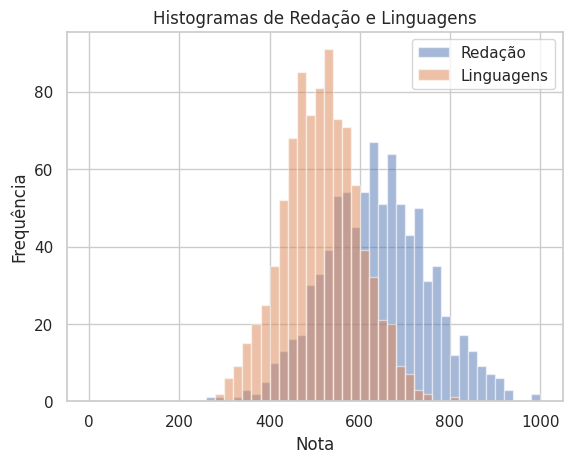

In [ ]:
import matplotlib.pyplot as plt

# Dados de Redação e Linguagens
dados_redacao = df['Redação']
dados_linguagens = df['Linguagens']

# Configurações para o histograma
bins = range(0, 1001, 20)
range_ = [0, 1000]

# Histogramas
plt.hist(dados_redacao, bins=bins, range=range_, alpha=0.5, label='Redação')
plt.hist(dados_linguagens, bins=bins, range=range_, alpha=0.5, label='Linguagens')

# Legendas
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.title('Histogramas de Redação e Linguagens')
plt.legend()

# Exibir o gráfico
plt.show()


**Não, pois a distribuição em ambos os lados agora estão mais desiguais.**

8. Faça um boxplot do quartil de todas as disciplinas de ciências da
natureza e redação. É possível enxergar outliers? Utilize o método IQR.

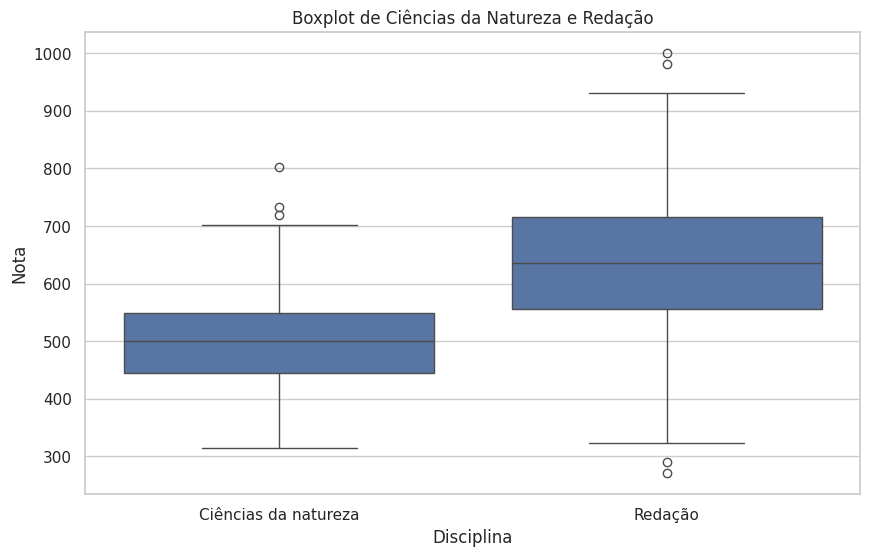

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dados de Ciências da Natureza e Redação
dados_ciencias_natureza = df['Ciências da natureza']
dados_redacao = df['Redação']

# Criar um DataFrame com as duas disciplinas
df_ciencias_redacao = df[['Ciências da natureza', 'Redação']]

sns.set(style="whitegrid")

# Criar o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(df_ciencias_redacao))

# Títulos
plt.xlabel('Disciplina')
plt.ylabel('Nota')
plt.title('Boxplot de Ciências da Natureza e Redação')

# Exibir o gráfico
plt.show()


Sim, é possível observar outliers em ambos os bloxplots, que estão representados acima do limite máxima da primeira e segunda caixas, e abaixo da segunda caixa. Os outliers são as bolinhas brancas que representam os dados discrepantes dos demais dados distribuídos no

9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um
valor acima de 5%)

In [ ]:
import pandas as pd

column_name = 'nota_total_ponderada'

# Calcular o IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para identificar outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Remover outliers
df_no_outliers = df[(df[column_name] >= lower_limit) & (df[column_name] <= upper_limit)]

# Calcular a média nacional original
media_nacional_original = df[column_name].mean()

# Calcular a média nacional sem outliers
media_nacional_sem_outliers = df_no_outliers[column_name].mean()

# Calcular a diferença percentual
diferenca_percentual = ((media_nacional_sem_outliers - media_nacional_original) / media_nacional_original) * 100

# Imprimir resultados
print(f"Média nacional original: {media_nacional_original}")
print(f"Média nacional sem outliers: {media_nacional_sem_outliers}")
print(f"Diferença percentual: {diferenca_percentual}%")


Média nacional original: 549.6504045383381
Média nacional sem outliers: 549.6504045383382
Diferença percentual: 2.068348113326757e-14%


**Os outliers não alteram significativamente a média geral.**

10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão

In [ ]:
import pandas as pd


# Selecionar as colunas
disciplinas = ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']

# Calcular a média, mediana e moda para cada disciplina
resultados_disciplinas = {'Disciplina': [], 'Média': [], 'Mediana': [], 'Moda': []}

for disciplina in disciplinas:
    resultados_disciplina = {'Disciplina': disciplina}
    resultados_disciplina['Média'] = df[disciplina].mean()
    resultados_disciplina['Mediana'] = df[disciplina].median()
    moda = df[disciplina].mode()
    resultados_disciplina['Moda'] = moda.iloc[0] if not moda.empty else None

    # Armazenar os resultados para a disciplina atual
    resultados_disciplinas['Disciplina'].append(resultados_disciplina['Disciplina'])
    resultados_disciplinas['Média'].append(resultados_disciplina['Média'])
    resultados_disciplinas['Mediana'].append(resultados_disciplina['Mediana'])
    resultados_disciplinas['Moda'].append(resultados_disciplina['Moda'])

# Criar um DataFrame
df_resultados_disciplinas = pd.DataFrame(resultados_disciplinas)

# Imprimir os resultados iniciais
print("Resultados Iniciais:")
print(df_resultados_disciplinas)

# Substituir valores nulos por média, mediana e moda e calcular desvio padrão geral
resultados_gerais = {'Substituindo por': [], 'Desvio Padrão Geral': []}

for substituicao in ['Média', 'Mediana', 'Moda']:
    df_substituido = df.copy()
    for disciplina in disciplinas:
        valor_substituicao = df_resultados_disciplinas.loc[df_resultados_disciplinas['Disciplina'] == disciplina, substituicao].values[0]
        df_substituido[disciplina].fillna(valor_substituicao, inplace=True)

    # Calcular desvio padrão geral
    desvio_padrao_geral = df_substituido['nota_total_ponderada'].std()

    # Armazenar os resultados
    resultados_gerais['Substituindo por'].append(substituicao)
    resultados_gerais['Desvio Padrão Geral'].append(desvio_padrao_geral)

# Criar um DataFrame com os resultados gerais
df_resultados_gerais = pd.DataFrame(resultados_gerais)

# Imprimir os resultados finais
print("\nResultados Finais:")
print(df_resultados_gerais)


Resultados Iniciais:
             Disciplina       Média     Mediana        Moda
0            Linguagens  514.524809  514.524809  514.524809
1      Ciências humanas  527.042281  527.042281  527.042281
2  Ciências da natureza  499.315583  499.315583  499.315583
3            Matemática  535.965660  535.965660  535.965660
4               Redação  637.783532  637.783532  637.783532

Resultados Finais:
  Substituindo por  Desvio Padrão Geral
0            Média             46.15044
1          Mediana             46.15044
2             Moda             46.15044
